In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import math as mat
import statistics as stat

from scipy.stats import chisquare
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

from tqdm.notebook import tqdm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
norm = pd.read_csv('test_data_analysis_healthy.csv')
pathology = pd.read_csv('test_data_analysis_ill.csv')

In [3]:
norm.head()

,angle,area XY,area ZY,area XZ,class,file
0,107.944086,2.564592e-07,2.900698e-07,6.207406e-07,0,1.edf
1,41.084692,6.271042e-07,2.981814e-07,1.390327e-06,0,10.edf
2,90.869783,2.103518e-07,7.744710e-08,2.363872e-07,0,11.edf
3,135.336736,5.141226e-07,5.578624e-07,1.405886e-06,0,12.edf
4,53.498848,3.335500e-08,1.620247e-07,3.173419e-07,0,13.edf


In [4]:
norm.describe()

,angle,area XY,area ZY,area XZ,class
count,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,22.0
mean,74.755332,4.372251e-07,3.641214e-07,9.668481e-07,0.0
std,41.009816,3.630782e-07,3.219467e-07,5.198191e-07,0.0
min,7.292270,4.312402e-09,9.767185e-09,2.363872e-07,0.0
25%,42.380854,1.890571e-07,1.086582e-07,5.797152e-07,0.0
50%,67.783209,3.533064e-07,2.941256e-07,8.524447e-07,0.0
75%,107.729650,6.225803e-07,5.575291e-07,1.352128e-06,0.0
max,135.336736,1.214741e-06,1.208213e-06,2.132315e-06,0.0


In [5]:
pathology.head()

,angle,area XY,area ZY,area XZ,class,file
0,90.235582,2.424185e-07,6.401535e-07,1.104737e-08,1,61-1.edf
1,58.311132,2.236326e-07,2.542808e-07,4.138347e-07,1,62.edf
2,49.263116,1.375380e-08,2.058379e-07,1.606429e-07,1,63.edf
3,35.716467,5.450050e-08,2.565739e-07,7.212155e-08,1,64.edf
4,62.086588,1.317732e-06,8.439604e-07,2.596829e-06,1,65.edf


In [6]:
pathology.describe()

,angle,area XY,area ZY,area XZ,class
count,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,15.0
mean,66.838697,3.671075e-07,2.525860e-07,5.772142e-07,1.0
std,51.705755,4.186123e-07,2.269778e-07,6.757654e-07,0.0
min,2.491115,1.375380e-08,1.967466e-08,1.104737e-08,1.0
25%,30.227751,6.313175e-08,9.536807e-08,1.277747e-07,1.0
50%,52.491435,1.704104e-07,2.052165e-07,3.859385e-07,1.0
75%,97.181040,6.761639e-07,2.975455e-07,7.220510e-07,1.0
max,153.584378,1.317732e-06,8.439604e-07,2.596829e-06,1.0


In [7]:
#normal distribution test
stat,pvalue=chisquare(norm.angle)
print('statistic = %.3f, p=%.3f'% (stat,pvalue))
if pvalue>0.05:
    print('angle normal : probably gaussian')
else:
     print('angle normal : probably not gaussian')

statistic = 472.447, p=0.000
angle normal : probably not gaussian


In [8]:
stat,pvalue=chisquare(pathology.angle)
print('statistic = %.3f, p=%.3f'% (stat,pvalue))
if pvalue>0.05:
    print('angle pathology : probably gaussian')
else:
     print('angle pathology : probably not gaussian')

statistic = 559.987, p=0.000
angle pathology : probably not gaussian


In [9]:
U1, p = mannwhitneyu(norm.angle, pathology.angle)
print(f'U1 = {U1}, p = {round(p, 5)}')
if p>0.05:
    print('отличия отсутствуют')
else:
     print('существуют отличия')

U1 = 187.0, p = 0.50599
отличия отсутствуют


In [10]:
#normal distribution test
stat,pvalue=chisquare(norm['area XY'])
print('statistic = %.3f, p=%.3f'% (stat,pvalue))
if pvalue>0.05:
    print('area xOy normal : probably gaussian')
else:
     print('area xOy normal : probably not gaussian')

statistic = 0.000, p=1.000
area xOy normal : probably gaussian


In [11]:
stat,pvalue=chisquare(pathology['area XY'])
print('statistic = %.3f, p=%.3f'% (stat,pvalue))
if pvalue>0.05:
    print('area xOy pathology : probably gaussian')
else:
     print('area xOy pathology : probably not gaussian')

statistic = 0.000, p=1.000
area xOy pathology : probably gaussian


In [12]:
_, p = ttest_ind(norm['area XY'], pathology['area XY'])
print(f'p = {round(p, 5)}')
if p>0.05:
    print('отличия отсутствуют')
else:
     print('существуют отличия')

p = 0.59116
отличия отсутствуют


In [76]:
frames = [norm, pathology]
result = pd.concat(frames)
result

,angle,area XY,area ZY,area XZ,class,file
0,107.944086,2.564592e-07,2.900698e-07,6.207406e-07,0,1.edf
1,41.084692,6.271042e-07,2.981814e-07,1.390327e-06,0,10.edf
2,90.869783,2.103518e-07,7.744710e-08,2.363872e-07,0,11.edf
3,135.336736,5.141226e-07,5.578624e-07,1.405886e-06,0,12.edf
4,53.498848,3.335500e-08,1.620247e-07,3.173419e-07,0,13.edf
5,61.639357,1.214741e-06,4.389717e-07,1.223365e-06,0,14.edf
6,51.209468,6.125123e-08,1.167028e-07,6.508041e-07,0,15.edf
7,92.805624,1.991401e-07,7.858660e-07,2.132315e-06,0,16.edf
8,72.723865,4.984853e-07,6.408894e-07,6.388547e-07,0,17.edf
9,124.932783,1.102874e-06,1.208213e-06,1.560849e-06,0,19.edf


In [77]:
result.pop('file')
result

,angle,area XY,area ZY,area XZ,class
0,107.944086,2.564592e-07,2.900698e-07,6.207406e-07,0
1,41.084692,6.271042e-07,2.981814e-07,1.390327e-06,0
2,90.869783,2.103518e-07,7.744710e-08,2.363872e-07,0
3,135.336736,5.141226e-07,5.578624e-07,1.405886e-06,0
4,53.498848,3.335500e-08,1.620247e-07,3.173419e-07,0
5,61.639357,1.214741e-06,4.389717e-07,1.223365e-06,0
6,51.209468,6.125123e-08,1.167028e-07,6.508041e-07,0
7,92.805624,1.991401e-07,7.858660e-07,2.132315e-06,0
8,72.723865,4.984853e-07,6.408894e-07,6.388547e-07,0
9,124.932783,1.102874e-06,1.208213e-06,1.560849e-06,0


In [78]:
def apply_lda(X_train, X_test, Y_train):
     
    
    x_scaler = StandardScaler()
    X_train = x_scaler.fit_transform(X_train)
    X_test = x_scaler.transform(X_test)
    
    LDA = LinearDiscriminantAnalysis() 
    LDA.fit(X_train, Y_train)
    
    X_train_new = LDA.transform(X_train)
    X_test_new = LDA.transform(X_test)
    
    return X_train_new, X_test_new, LDA, x_scaler

In [79]:
def apply_pca(X_train, X_test, Y_train=0):
    
    x_scaler = StandardScaler()
    X_train_scaled = x_scaler.fit_transform(X_train)
    X_test_scaled = x_scaler.transform(X_test)

    pca = PCA(n_components=2)
    pca.fit(X_train_scaled)

    PC_train, PC_test = pca.transform(X_train_scaled), pca.transform(X_test_scaled)

    return PC_train, PC_test, pca, x_scaler

In [98]:
Y = result['class']
X = result.drop(['class'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10, stratify=Y, shuffle=True)
X_train, X_test, DR, x_scaler = apply_pca(X_train.values, X_test.values, Y_train.values)


f1 score:0.667


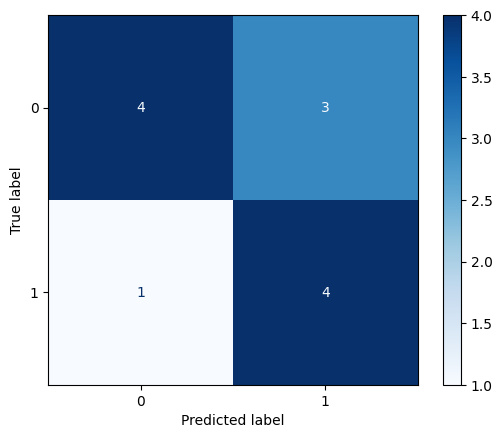

In [99]:
model = SVC(kernel = 'linear') 
model.fit(X_train, Y_train)
prediction = model.predict(X_test) 
cm = confusion_matrix(prediction, Y_test)

#print(f'f1 score:{f1_score(Y_test, prediction, average="binary", pos_label = "center"):.3f}')
print(f'f1 score:{f1_score(Y_test, prediction, average="macro"):.3f}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm.T, display_labels=model.classes_)
disp.plot(cmap = 'Blues')

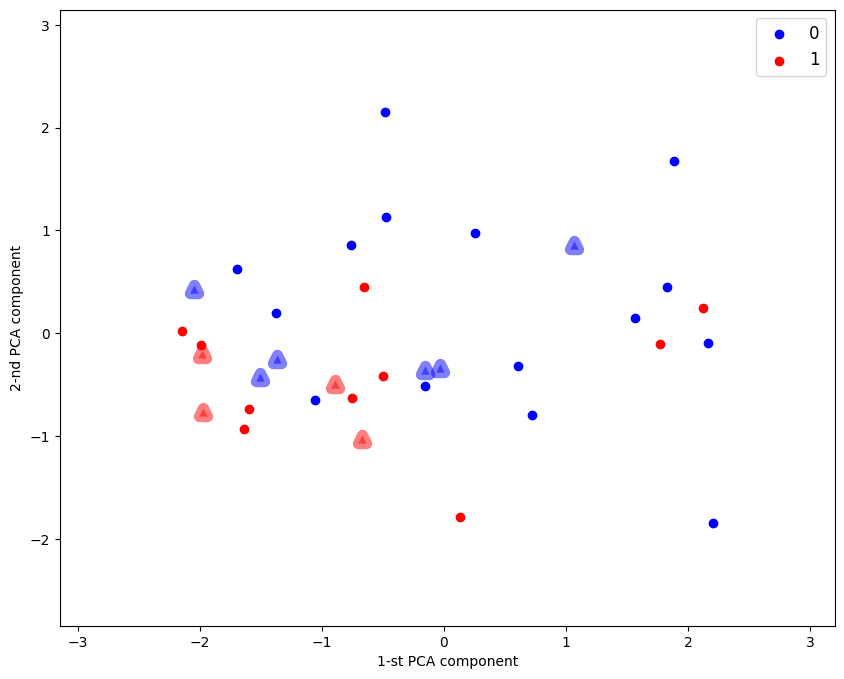

In [97]:
plt.figure(figsize=(10, 8))
plt.xlim(X_train[:, 0].min()-1, X_train[:, 0].max()+1)
plt.ylim(X_train[:, 1].min()-1, X_train[:, 1].max()+1)


colors = ['blue', 'red']

for i, target in enumerate(pd.unique(Y_train)):
    index = np.where(Y_train == target)
    plt.scatter(X_train[index, 0], 
                X_train[index, 1], 
                c=colors[i], 
                label=target,
                linewidths=1,
                )
plt.legend(fontsize='large')
plt.xlabel('1-st PCA component')
plt.ylabel('2-nd PCA component')



for i, target in enumerate(pd.unique(Y_train)):
    index = np.where(Y_test == target)
    plt.scatter(X_test[index, 0], 
                X_test[index, 1], 
                c=colors[i], 
                label=target,
                linewidths=8,
                marker='^',
                alpha=0.5)

Точность модели на обучающей выборке:  0.72
Точность модели на тестовой выборке:  0.67


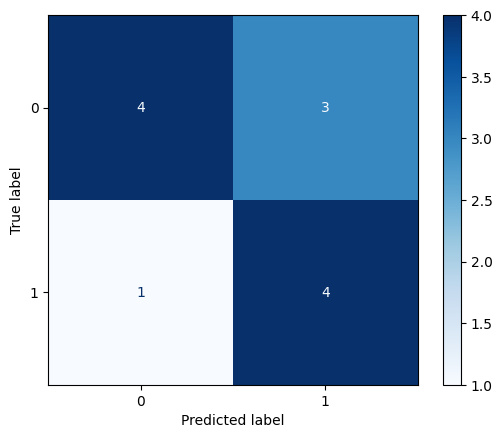

In [100]:
SVM_model = SVC(C = 1, kernel = 'sigmoid')
SVM_model.fit(X_train, Y_train)
SVM_prediction = SVM_model.predict(X_test)

SVM_train_accuracy = SVM_model.score(X_train, Y_train)
SVM_test_accuracy = SVM_model.score(X_test, Y_test)
print ('Точность модели на обучающей выборке: ', round (SVM_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (SVM_test_accuracy, 2))

fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix(SVM_prediction, Y_test).T)
disp.plot(cmap = 'Blues', ax=ax);

In [58]:
par = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'C': [0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]}
search = GridSearchCV(SVM_model,par,cv=10)
search.fit(X_train, Y_train)
search.best_params_

{'C': 1.0, 'kernel': 'sigmoid'}

Точность модели на обучающей выборке:  0.72
Точность модели на тестовой выборке:  0.5


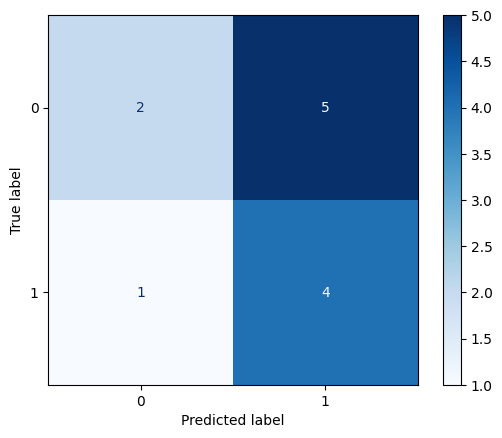

In [101]:
NB_model = GaussianNB() 
NB_model.fit(X_train, Y_train)
NB_prediction = NB_model.predict(X_test)

NB_train_accuracy = NB_model.score(X_train, Y_train)
NB_test_accuracy = NB_model.score(X_test, Y_test)
print ('Точность модели на обучающей выборке: ', round (NB_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (NB_test_accuracy, 2))

fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix(NB_prediction, Y_test).T)
disp.plot(cmap = 'Blues', ax=ax);

Точность модели на обучающей выборке:  0.68
Точность модели на тестовой выборке:  0.75


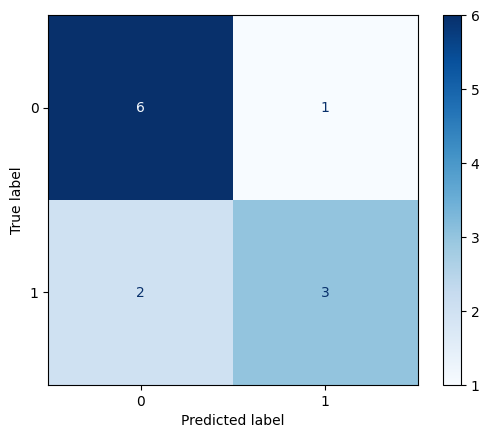

In [110]:
KNN_model = KNeighborsClassifier(n_neighbors = 4)
KNN_model.fit(X_train, Y_train)
KNN_prediction = KNN_model.predict(X_test)

KNN_train_accuracy = KNN_model.score(X_train, Y_train)
KNN_test_accuracy = KNN_model.score(X_test, Y_test)
print ('Точность модели на обучающей выборке: ', round (KNN_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (KNN_test_accuracy, 2))

fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix(KNN_prediction, Y_test).T)
disp.plot(cmap = 'Blues', ax=ax);